In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Load both CSV files
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

# Step 2: Merge deliveries with matches to get season info
# 'id' in matches corresponds to 'match_id' in deliveries
merged_df = deliveries.merge(
    matches[['id', 'season']],  # keep only id and season
    left_on='match_id',
    right_on='id',
    how='left'
)

# Step 3: Drop duplicate 'id' column from merge
merged_df = merged_df.drop(columns=['id'])

# Step 4: Reset index for cleanliness
merged_df = merged_df.reset_index(drop=True)

# Step 5: Check the merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
merged_df.head()


Merged DataFrame shape: (260920, 18)
Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'season']


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08


In [2]:
# Filter for MS Dhoni as striker
dhoni_df = merged_df[merged_df['batter'] == 'MS Dhoni'].reset_index(drop=True)

# Show first 10 rows
dhoni_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335983,1,Chennai Super Kings,Kings XI Punjab,6,3,MS Dhoni,IK Pathan,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN,2007/08
1,335983,1,Chennai Super Kings,Kings XI Punjab,6,6,MS Dhoni,IK Pathan,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN,2007/08
2,335983,1,Chennai Super Kings,Kings XI Punjab,7,1,MS Dhoni,JR Hopes,MEK Hussey,0,0,0,NaN,1,MS Dhoni,lbw,NaN,2007/08
3,335989,1,Chennai Super Kings,Mumbai Indians,15,1,MS Dhoni,DJ Bravo,ML Hayden,0,1,1,wides,0,NaN,NaN,NaN,2007/08
4,335989,1,Chennai Super Kings,Mumbai Indians,15,2,MS Dhoni,DJ Bravo,ML Hayden,4,0,4,NaN,0,NaN,NaN,NaN,2007/08
5,335989,1,Chennai Super Kings,Mumbai Indians,15,3,MS Dhoni,DJ Bravo,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
6,335989,1,Chennai Super Kings,Mumbai Indians,15,4,MS Dhoni,DJ Bravo,ML Hayden,4,0,4,NaN,0,NaN,NaN,NaN,2007/08
7,335989,1,Chennai Super Kings,Mumbai Indians,15,5,MS Dhoni,DJ Bravo,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN,2007/08
8,335989,1,Chennai Super Kings,Mumbai Indians,16,3,MS Dhoni,MA Khote,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN,2007/08
9,335989,1,Chennai Super Kings,Mumbai Indians,16,5,MS Dhoni,MA Khote,ML Hayden,2,0,2,NaN,0,NaN,NaN,NaN,2007/08


In [3]:
# Total runs scored by Dhoni
total_runs = dhoni_df['batsman_runs'].sum()

# Total balls faced by Dhoni
# Each row in dhoni_df is one legal delivery faced
total_balls = len(dhoni_df)

print(f"Total runs scored by MS Dhoni: {total_runs}")
print(f"Total balls faced by MS Dhoni: {total_balls}")


Total runs scored by MS Dhoni: 5243
Total balls faced by MS Dhoni: 3947


In [4]:
print(sorted(merged_df['season'].unique()))

['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']


In [5]:
dhoni_recent_df = merged_df[
    (merged_df['batter'] == 'MS Dhoni') &
    (merged_df['season'].isin(['2023', '2024']))
].reset_index(drop=True)

# Show first 10 rows
dhoni_recent_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,1359475,1,Chennai Super Kings,Gujarat Titans,17,5,MS Dhoni,AS Joseph,S Dube,1,0,1,NaN,0,NaN,NaN,NaN,2023
1,1359475,1,Chennai Super Kings,Gujarat Titans,18,6,MS Dhoni,Mohammed Shami,MJ Santner,1,0,1,NaN,0,NaN,NaN,NaN,2023
2,1359475,1,Chennai Super Kings,Gujarat Titans,19,1,MS Dhoni,J Little,MJ Santner,1,0,1,NaN,0,NaN,NaN,NaN,2023
3,1359475,1,Chennai Super Kings,Gujarat Titans,19,3,MS Dhoni,J Little,MJ Santner,6,0,6,NaN,0,NaN,NaN,NaN,2023
4,1359475,1,Chennai Super Kings,Gujarat Titans,19,4,MS Dhoni,J Little,MJ Santner,4,0,4,NaN,0,NaN,NaN,NaN,2023
5,1359475,1,Chennai Super Kings,Gujarat Titans,19,5,MS Dhoni,J Little,MJ Santner,0,0,0,NaN,0,NaN,NaN,NaN,2023
6,1359475,1,Chennai Super Kings,Gujarat Titans,19,6,MS Dhoni,J Little,MJ Santner,1,0,1,NaN,0,NaN,NaN,NaN,2023
7,1359480,1,Chennai Super Kings,Lucknow Super Giants,19,2,MS Dhoni,MA Wood,AT Rayudu,6,0,6,NaN,0,NaN,NaN,NaN,2023
8,1359480,1,Chennai Super Kings,Lucknow Super Giants,19,3,MS Dhoni,MA Wood,AT Rayudu,6,0,6,NaN,0,NaN,NaN,NaN,2023
9,1359480,1,Chennai Super Kings,Lucknow Super Giants,19,4,MS Dhoni,MA Wood,AT Rayudu,0,0,0,NaN,1,MS Dhoni,caught,Ravi Bishnoi,2023


In [6]:
# Total balls faced
balls_faced = len(dhoni_recent_df)

# Total runs scored
runs_scored = dhoni_recent_df['batsman_runs'].sum()

# Number of 4s and 6s
fours = len(dhoni_recent_df[dhoni_recent_df['batsman_runs'] == 4])
sixes = len(dhoni_recent_df[dhoni_recent_df['batsman_runs'] == 6])

# Strike rate = (runs / balls) * 100
strike_rate = (runs_scored / balls_faced) * 100 if balls_faced > 0 else 0

# Display results
print(f"MS Dhoni in 2023 & 2024:")
print(f"Balls faced: {balls_faced}")
print(f"Runs scored: {runs_scored}")
print(f"4s: {fours}")
print(f"6s: {sixes}")
print(f"Strike Rate: {strike_rate:.2f}")



MS Dhoni in 2023 & 2024:
Balls faced: 145
Runs scored: 265
4s: 17
6s: 23
Strike Rate: 182.76


In [7]:
# Filter for last 5 overs (16 to 20)
last5_df = dhoni_recent_df[dhoni_recent_df['over'].isin([16, 17, 18, 19, 20])]

# Balls faced
balls_faced_last5 = len(last5_df)

# Runs scored
runs_last5 = last5_df['batsman_runs'].sum()

# Number of 4s and 6s
fours_last5 = len(last5_df[last5_df['batsman_runs'] == 4])
sixes_last5 = len(last5_df[last5_df['batsman_runs'] == 6])

# Strike rate
strike_rate_last5 = (runs_last5 / balls_faced_last5) * 100 if balls_faced_last5 > 0 else 0

# Display results
print(f"MS Dhoni in last 5 overs (2023 & 2024):")
print(f"Balls faced: {balls_faced_last5}")
print(f"Runs scored: {runs_last5}")
print(f"4s: {fours_last5}")
print(f"6s: {sixes_last5}")
print(f"Strike Rate: {strike_rate_last5:.2f}")


MS Dhoni in last 5 overs (2023 & 2024):
Balls faced: 137
Runs scored: 256
4s: 16
6s: 23
Strike Rate: 186.86


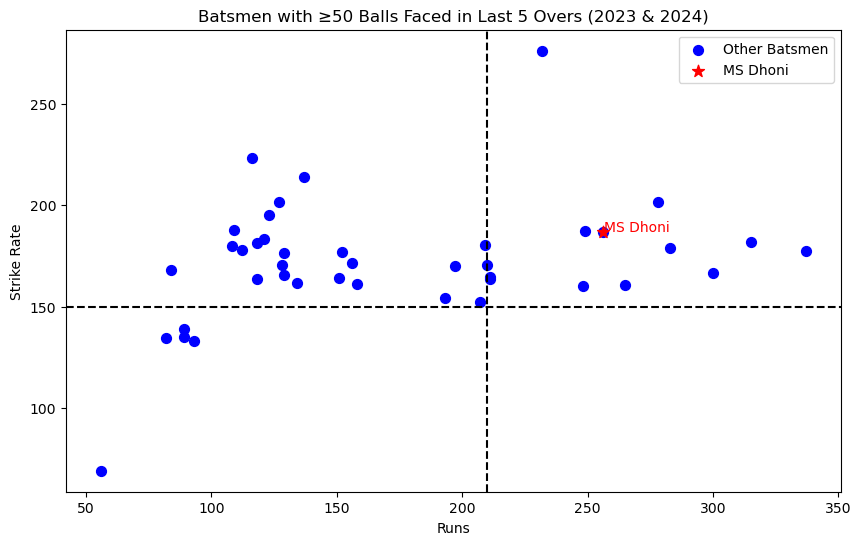

In [9]:
plt.figure(figsize=(10,6))
last5_df = merged_df[
    (merged_df['over'].isin([16, 17, 18, 19, 20])) &
    (merged_df['season'].isin(['2023', '2024']))
]

# Step 2: Group by batsman
stats = last5_df.groupby('batter').agg(
    balls_faced=('batsman_runs', 'count'),
    runs=('batsman_runs', 'sum')
).reset_index()

# Step 3: Calculate strike rate
stats['strike_rate'] = (stats['runs'] / stats['balls_faced']) * 100

# Step 4: Filter for minimum 50 balls faced
stats_50plus = stats[stats['balls_faced'] >= 50]

# Plot all batsmen
plt.scatter(stats_50plus['runs'], stats_50plus['strike_rate'], color='blue', s=50, label='Other Batsmen')

# Highlight Dhoni
dhoni_point = stats_50plus[stats_50plus['batter'] == 'MS Dhoni']
if not dhoni_point.empty:
    plt.scatter(dhoni_point['runs'], dhoni_point['strike_rate'], color='red', s=80, marker='*', label='MS Dhoni')
    plt.text(dhoni_point['runs'].values[0]+0.5, dhoni_point['strike_rate'].values[0]+0.5,
             'MS Dhoni', fontsize=10, color='red')

# Dotted lines at runs=150 and strike_rate=150 (bring to front)
plt.axvline(x=210, color='black', linestyle='--', linewidth=1.5, zorder=5)
plt.axhline(y=150, color='black', linestyle='--', linewidth=1.5, zorder=5)

# Turn off grid
plt.grid(False)

plt.title('Batsmen with ≥50 Balls Faced in Last 5 Overs (2023 & 2024)')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.legend()
plt.show()


### Conclusion
#1 Role of ms dhoni in the current csk side is to finish the which makes batting in last 5 over very important
#2 we have here compared the stats of ms dhoni's last 2 season with the other finishers of the league 
#3 from the above scatter plot wa can conclude that ms dhoni is still among the best finishers in the league 
#4 stats of  Dhoni in last 5 overs (2023 & 2024):
#Balls faced: 137
#Runs scored: 256
#4s: 16
#6s: 23
#Strike Rate: 186.86
#This Shows Dhoni is still good enough to bat.